In [1]:
using Pkg

In [2]:
Pkg.add("ImageBase")

    Updating registry at `C:\Users\amans\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\amans\Project.toml`
  No Changes to `C:\Users\amans\Manifest.toml`


In [3]:
using ImageBase

In [4]:
A = [2 4 8; 3 9 27; 4 16 64]

3×3 Matrix{Int64}:
 2   4   8
 3   9  27
 4  16  64

In [5]:
fdiff(A,dims=1)

3×3 Matrix{Int64}:
  1    5   19
  1    7   37
 -2  -12  -56

In [6]:
fdiff(A,dims=2)

3×3 Matrix{Int64}:
  2   4   -6
  6  18  -24
 12  48  -60

In [7]:
fdiff(A,dims=2)

3×3 Matrix{Int64}:
  2   4   -6
  6  18  -24
 12  48  -60

In [8]:
using Zygote: gradient

In [9]:
using Zygote: @adjoint

In [10]:
gradient(meanfinite,A)

([0.1111111111111111 0.1111111111111111 0.1111111111111111; 0.1111111111111111 0.1111111111111111 0.1111111111111111; 0.1111111111111111 0.1111111111111111 0.1111111111111111],)

In [11]:
mul(a, b) = a*b;

In [12]:
@adjoint mul(a, b) = mul(a, b), c̄ -> (c̄*b, c̄*a)

In [13]:
mul(2,3)

6

In [14]:
gradient(mul, 2, 3)

(3.0, 2.0)

In [15]:
using Zygote, ChainRules, ChainRulesCore
using ImageCore
using ImageCore.MappedArrays: of_eltype

In [16]:
# ImageBase.fdiff(A::AbstractArray; kwargs...) = fdiff!(similar(A, maybe_floattype(eltype(A))), A; kwargs...)

In [17]:
# function fdiff!(dst::AbstractArray, src::AbstractArray;
#         dims=_fdiff_default_dims(src),
#         rev=false,
#         boundary::Symbol=:periodic)
#     isnothing(dims) && throw(UndefKeywordError(:dims))
#     axes(dst) == axes(src) || throw(ArgumentError("axes of all input arrays should be equal. Instead they are $(axes(dst)) and $(axes(src))."))
#     N = ndims(src)
#     1 <= dims <= N || throw(ArgumentError("dimension $dims out of range (1:$N)"))

#     src = of_eltype(maybe_floattype(eltype(dst)), src)
#     r = axes(src)
#     r0 = ntuple(i -> i == dims ? UnitRange(first(r[i]), last(r[i]) - 1) : UnitRange(r[i]), N)
#     r1 = ntuple(i -> i == dims ? UnitRange(first(r[i])+1, last(r[i])) : UnitRange(r[i]), N)

#     d0 = ntuple(i -> i == dims ? UnitRange(last(r[i]), last(r[i])) : UnitRange(r[i]), N)
#     d1 = ntuple(i -> i == dims ? UnitRange(first(r[i]), first(r[i])) : UnitRange(r[i]), N)

#     if rev
#         dst[r1...] .= view(src, r1...) .- view(src, r0...)
#         if boundary == :periodic
#             dst[d1...] .= view(src, d1...) .- view(src, d0...)
#         elseif boundary == :zero
#             dst[d1...] .= zero(eltype(dst))
#         else
#             throw(ArgumentError("Wrong boundary condition $boundary"))
#         end
#     else
#         dst[r0...] .= view(src, r1...) .- view(src, r0...)
#         if boundary == :periodic
#             dst[d0...] .= view(src, d1...) .- view(src, d0...)
#         elseif boundary == :zero
#             dst[d0...] .= zero(eltype(dst))
#         else
#             throw(ArgumentError("Wrong boundary condition $boundary"))
#         end
#     end

#     return dst
# end

In [18]:
B=2

2

In [19]:
# @adjoint ImageBase.fdiff(A::AbstractArray; kwargs...) = fdiff!(similar(A, maybe_floattype(eltype(A))), A; kwargs...)

In [20]:
function add(a,b)
    return a+b
end

add (generic function with 1 method)

In [21]:
function subtract(a,b)
    return a-b
end

subtract (generic function with 1 method)

In [22]:
subtract(2,1)

1

In [23]:
add(1,2)

3

In [24]:
gradient(add,1,2)

(1.0, 1.0)

In [25]:
gradient(subtract,2,1)

(1.0, -1.0)

In [26]:
y, back =  Zygote.pullback(add,1,2)

(3, Zygote.var"#56#57"{typeof(∂(add))}(∂(add)))

In [27]:
z, back1 = Zygote.pullback(subtract,2,1)

(1, Zygote.var"#56#57"{typeof(∂(subtract))}(∂(subtract)))

In [28]:
back

#56 (generic function with 1 method)

In [29]:
N=2
dims=2

2

In [30]:
r = axes(A)

(Base.OneTo(3), Base.OneTo(3))

In [31]:
r[1]

Base.OneTo(3)

In [32]:
r0 = ntuple(i -> i == dims ? UnitRange(first(r[i]), last(r[i]) - 1) : UnitRange(r[i]), N)

(1:3, 1:2)

In [33]:
r1 = ntuple(i -> i == dims ? UnitRange(first(r[i])+1, last(r[i])) : UnitRange(r[i]), N)

(1:3, 2:3)

In [34]:
d0 = ntuple(i -> i == dims ? UnitRange(last(r[i]), last(r[i])) : UnitRange(r[i]), N)

(1:3, 3:3)

In [35]:
d1 = ntuple(i -> i == dims ? UnitRange(first(r[i]), first(r[i])) : UnitRange(r[i]),N)

(1:3, 1:1)

In [36]:
dst::AbstractArray{T,N}

LoadError: UndefVarError: T not defined

In [37]:
B = [2 4 8 1; 3 9 27 2; 4 16 64 3]

3×4 Matrix{Int64}:
 2   4   8  1
 3   9  27  2
 4  16  64  3

In [38]:
c= similar(B, eltype(B))

3×4 Matrix{Int64}:
 184090632  184090632  184090632  184090632
 184090632  184090632  184090632  184090632
 184090632  184090632  184090632  184090632

In [39]:
d= similar(A,Tuple{eltype(A),eltype(A)})

3×3 Matrix{Tuple{Int64, Int64}}:
 (0, 1)  (0, 0)  (0, 0)
 (0, 1)  (0, 0)  (0, 0)
 (1, 1)  (0, 0)  (0, 0)

In [40]:
size(d)[1]

3

In [41]:
function pull(Δ)
for i in range(1,size(d)[1]), j in range(1,size(d)[2])
        d[i,j] = (Δ,-Δ)
end
end

pull (generic function with 1 method)

In [42]:
final = similar(B,Tuple{})

3×4 Matrix{Tuple{}}:
 ()  ()  ()  ()
 ()  ()  ()  ()
 ()  ()  ()  ()

In [43]:
# fill!(final,(c̄,-c̄))

In [44]:
gradient((x,y) -> fdiff(x,dims=y),A,2)

LoadError: Output is an array, so the gradient is not defined. Perhaps you wanted jacobian.

In [45]:
using ImageBase.FiniteDiff: fdiff, fdiff!

In [46]:
size(A)[2]

3

In [47]:
using Test

In [48]:
@adjoint function fdiff(A::AbstractArray; kwargs...)
  y = fdiff!(similar(A, eltype(A)), A; kwargs...)
  final = similar(A, eltype(A))
  function pullback(Δ)
    fill!(final,Δ)
    return (final,)
  end
  return (y, pullback)
end

In [49]:
fdiff(A,dims=2)

3×3 Matrix{Int64}:
  2   4   -6
  6  18  -24
 12  48  -60

In [50]:
@test gradient(x -> sum(x),fdiff(A,dims=2))[1] == ones(Float64,size(A))

Test Passed
  Expression: (gradient((x->(sum(x);)), fdiff(A, dims = 2)))[1] == ones(Float64, size(A))
   Evaluated: [1.0 1.0 1.0; 1.0 1.0 1.0; 1.0 1.0 1.0] == [1.0 1.0 1.0; 1.0 1.0 1.0; 1.0 1.0 1.0]

In [51]:
@test gradient(x -> sum(x),fdiff(A,dims=2))[1] == ones(Float64,size(A))

Test Passed
  Expression: (gradient((x->(sum(x);)), fdiff(A, dims = 2)))[1] == ones(Float64, size(A))
   Evaluated: [1.0 1.0 1.0; 1.0 1.0 1.0; 1.0 1.0 1.0] == [1.0 1.0 1.0; 1.0 1.0 1.0; 1.0 1.0 1.0]

In [52]:
@test Zygote.gradient(x -> sum(x),fdiff(A,dims=1,boundary=:periodic))[1] == ones(Float64,size(A))

Test Passed
  Expression: (Zygote.gradient((x->(sum(x);)), fdiff(A, dims = 1, boundary = :periodic)))[1] == ones(Float64, size(A))
   Evaluated: [1.0 1.0 1.0; 1.0 1.0 1.0; 1.0 1.0 1.0] == [1.0 1.0 1.0; 1.0 1.0 1.0; 1.0 1.0 1.0]

In [53]:
B = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [54]:
a_fd_2 = [3 6 9 12; 6 18 27 36; 9 27 54 72; 12 36 81 98]

4×4 Matrix{Int64}:
  3   6   9  12
  6  18  27  36
  9  27  54  72
 12  36  81  98

In [55]:
fdiff(B,dims=1)

2×2 Matrix{Int64}:
  2   2
 -2  -2

In [56]:
using StaticArrays

In [57]:
for t in (Float32, Float64, RGB{Float32}, RGB{Float64})
        inp = rand(t, 2)
        inp_mat = rand(t, 3, 3)
        _abs(c)  = mapreducec(v->abs(float(v)), +, 0, c)
        @test Zygote.gradient(x->_abs(sum(SVector{2, t}(x))), inp)[1] == ones(t, 2)
        @test Zygote.gradient(x->_abs(sum(SMatrix{3, 3, t, 9}(x))), inp_mat)[1] == ones(t, 3, 3)
    end

Error During Test at In[57]:5
  Test threw exception
  Expression: (Zygote.gradient((x->(_abs(sum(SVector{2, t}(x)));)), inp))[1] == ones(t, 2)
  Need an adjoint for constructor SVector{2, Float32}. Gradient is of type FillArrays.Fill{Float32, 1, Tuple{Base.OneTo{Int64}}}
  Stacktrace:
    [1] error(s::String)
      @ Base .\error.jl:33
    [2] (::Zygote.Jnew{SVector{2, Float32}, Nothing, false})(Δ::FillArrays.Fill{Float32, 1, Tuple{Base.OneTo{Int64}}})
      @ Zygote C:\Users\amans\.julia\packages\Zygote\H6vD3\src\lib\lib.jl:324
    [3] (::Zygote.var"#1782#back#228"{Zygote.Jnew{SVector{2, Float32}, Nothing, false}})(Δ::FillArrays.Fill{Float32, 1, Tuple{Base.OneTo{Int64}}})
      @ Zygote C:\Users\amans\.julia\packages\ZygoteRules\AIbCs\src\adjoint.jl:67
    [4] Pullback
      @ C:\Users\amans\.julia\packages\StaticArrays\58yy1\src\SArray.jl:23 [inlined]
    [5] (::typeof(∂(SVector{2, Float32})))(Δ::FillArrays.Fill{Float32, 1, Tuple{Base.OneTo{Int64}}})
      @ Zygote C:\Users\amans\.j

LoadError: [91mThere was an error during testing[39m

In [58]:
@test gradient(x -> sum(x),fdiff(B,dims=2))[1] == ones(Float64,size(B))

Test Passed
  Expression: (gradient((x->(sum(x);)), fdiff(B, dims = 2)))[1] == ones(Float64, size(B))
   Evaluated: [1.0 1.0; 1.0 1.0] == [1.0 1.0; 1.0 1.0]

In [59]:
@test 1+1 == 2

Test Passed
  Expression: 1 + 1 == 2
   Evaluated: 2 == 2

In [60]:
using Images
using Test

In [61]:
@adjoint function channelview(x::AbstractArray{T,N}) where {T, N}
    e = eltype(x)
    y = channelview(x)
    function pullback(Δ)
        return (collect(colorview(e,Δ)),)
    end
    return (y, pullback)
end

In [62]:
ds4 = (7, 7, 4, 5)
i = rand(ds4...)

7×7×4×5 Array{Float64, 4}:
[:, :, 1, 1] =
 0.684395  0.14816   0.897014  0.135856  0.645647  0.555344   0.460727
 0.537376  0.579023  0.191688  0.105232  0.434985  0.295636   0.922888
 0.730299  0.360124  0.328971  0.249114  0.437941  0.0687609  0.702429
 0.555287  0.134983  0.625669  0.871212  0.638381  0.39562    0.728057
 0.789521  0.410432  0.250406  0.96414   0.429165  0.912939   0.131073
 0.137616  0.159016  0.694245  0.762921  0.42087   0.518336   0.834378
 0.139084  0.178532  0.466554  0.187772  0.257898  0.0294469  0.934778

[:, :, 2, 1] =
 0.643773  0.39083   0.0907333  0.986856  0.383806  0.98336   0.953086
 0.905551  0.635727  0.712448   0.122899  0.288148  0.630552  0.107417
 0.988336  0.256935  0.230649   0.867636  0.810762  0.462694  0.609484
 0.37605   0.78241   0.948116   0.910086  0.896877  0.177149  0.567231
 0.965525  0.930754  0.801228   0.842725  0.794713  0.31928   0.218311
 0.811754  0.609215  0.520042   0.64316   0.354769  0.591263  0.237574
 0.809325  0.677175

In [63]:
fdiff(A,dims=1)

3×3 Matrix{Int64}:
  1    5   19
  1    7   37
 -2  -12  -56

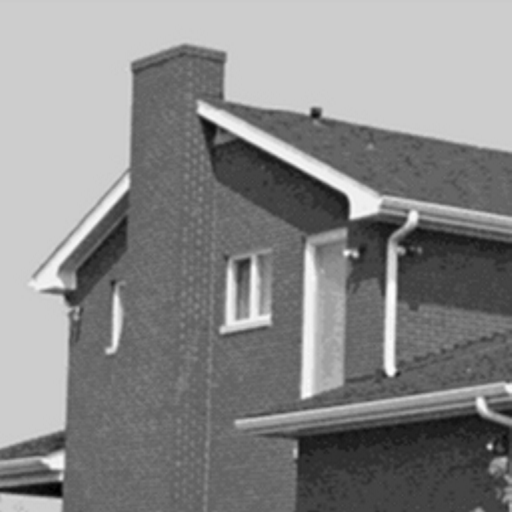

In [64]:
using Images, TestImages
img = Gray.(testimage("house"))

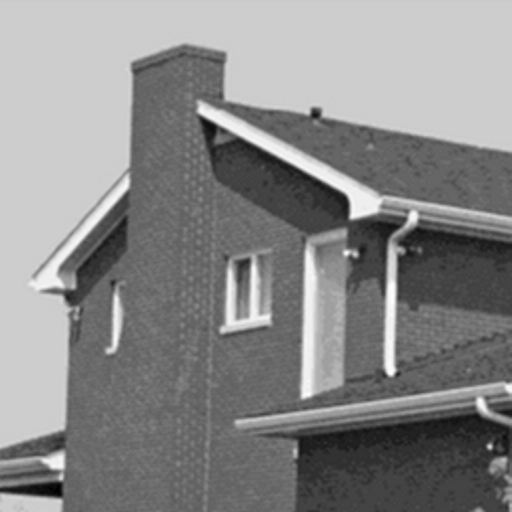

In [65]:
img1 = RGB.(img)

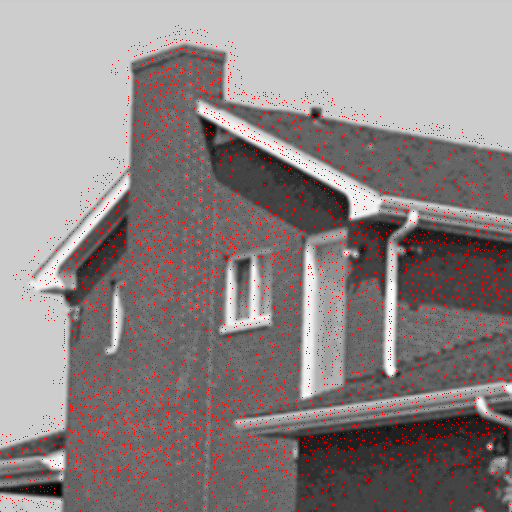

In [66]:
corners = imcorner(img)
img_copy = RGB.(img)
img_copy[corners] .= RGB(1.0, 0.0, 0.0)
img_copy

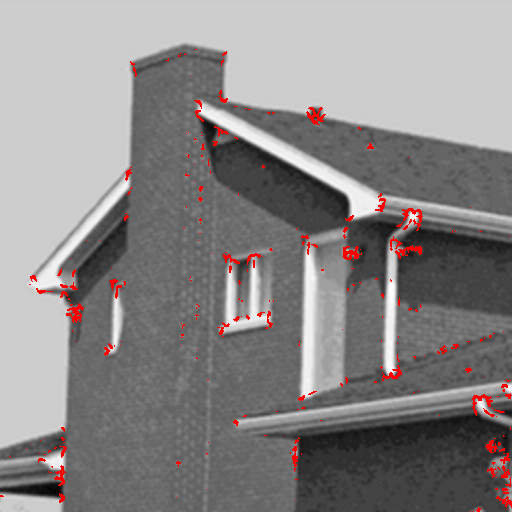

In [67]:
corners = imcorner(img, Percentile(98.5))
img_copy2 = RGB.(img)
img_copy2[corners] .= RGB(1.0, 0.0, 0.0)
img_copy2

In [68]:
A

3×3 Matrix{Int64}:
 2   4   8
 3   9  27
 4  16  64

In [69]:
minimum_finite(A)

2

In [70]:
maximum_finite(A)

64

In [71]:
sumfinite(A)

137

In [72]:
ImageBase.meanfinite(A)

15.222222222222221

In [73]:
varfinite(A)

398.19444444444446

In [74]:
sumfinite(identity, A)

137

In [75]:
using ImageCore

In [76]:
@adjoint function fdiff(A::AbstractArray; kwargs...)
    y = fdiff!(similar(A, maybe_floattype(eltype(A))), A; kwargs...)
    final = similar(A,Tuple{eltype(A),eltype(A)})
    function pullback(Δ)
        fill!(final,(Δ,-Δ))
    return (final,)
    end
    return (y,pullback)
end

In [77]:
meanfinite(A; kwargs...) = meanfinite(identity, A; kwargs...)

if Base.VERSION >= v"1.1"
    function meanfinite(f, A; kwargs...)
        s = sumfinite(f, A; kwargs...)
        n = sum(IfElse(isfinite, x->true, x->false), A; kwargs...)   # TODO: replace with `Returns`
        return s./n
    end
else
    function meanfinite(f, A; kwargs...)
        s = sumfinite(f, A; kwargs...)
        n = sum(IfElse(isfinite, x->true, x->false).(A); kwargs...)
        return s./n
    end
end

LoadError: error in method definition: function ImageBase.meanfinite must be explicitly imported to be extended

In [78]:
@adjoint function sumfinite(A::AbstractArray{T,N}; kwargs...) where {T,N}
    y = sumfinite(identity, A; kwargs...)
    final = similar(A,eltype(A))
    function pullback(Δ)
        fill!(final,Δ)
        return (final,)
    end
    return (y,pullback)
end

In [79]:
@adjoint function meanfinite(A::AbstractArray{T,N}; kwargs...) where {T,N}
    y = sumfinite(identity, A; kwargs...)
    final = similar(A,eltype(A))
    function pullback(Δ)
        fill!(final,Δ/length(A))
        return (final,)
    end
    return (y,pullback)
end

In [80]:
length(A)

9

In [81]:
b = gradient(ImageBase.meanfinite,A)

LoadError: InexactError: Int64(0.1111111111111111)

In [82]:
c = gradient(ImageBase.varfinite, A)

LoadError: InexactError: Int64(30.444444444444443)

In [83]:
C = [2 4 8 1; 3 9 64 2; 4 16 64 1]

3×4 Matrix{Int64}:
 2   4   8  1
 3   9  64  2
 4  16  64  1

In [84]:
y = similar(A,eltype(A))

3×3 Matrix{Int64}:
 2326598592  2321322224    1
 2066203728  2321319344   -1
 2326599152   184090632  257

In [85]:
fill!(y,1.0)

3×3 Matrix{Int64}:
 1  1  1
 1  1  1
 1  1  1

In [86]:
b = Tuple(y)

(1, 1, 1, 1, 1, 1, 1, 1, 1)

In [87]:
typeof(b)

NTuple{9, Int64}

In [88]:
A

3×3 Matrix{Int64}:
 2   4   8
 3   9  27
 4  16  64

In [89]:
C

3×4 Matrix{Int64}:
 2   4   8  1
 3   9  64  2
 4  16  64  1

In [90]:
maximum_finite(C)

64

In [91]:
findall(C .== 64)

2-element Vector{CartesianIndex{2}}:
 CartesianIndex(2, 3)
 CartesianIndex(3, 3)

In [92]:
indexArray = first(findall( x -> x == 64, C ))

CartesianIndex(2, 3)

In [93]:
A[indexArray] = 1

1

In [94]:
A

3×3 Matrix{Int64}:
 2   4   8
 3   9   1
 4  16  64

In [95]:
first(indexArray)

LoadError: iteration is deliberately unsupported for CartesianIndex. Use `I` rather than `I...`, or use `Tuple(I)...`

In [96]:
last(indexArray)

LoadError: MethodError: no method matching lastindex(::CartesianIndex{2})
[0mClosest candidates are:
[0m  lastindex(::Any, [91m::Any[39m) at C:\Users\amans\AppData\Local\Programs\Julia-1.7.1\share\julia\base\abstractarray.jl:373
[0m  lastindex([91m::Union{DataStructures.SortedDict, DataStructures.SortedMultiDict, DataStructures.SortedSet}[39m) at C:\Users\amans\.julia\packages\DataStructures\vSp4s\src\tokens2.jl:19
[0m  lastindex([91m::AbstractChar[39m) at C:\Users\amans\AppData\Local\Programs\Julia-1.7.1\share\julia\base\char.jl:201
[0m  ...

In [97]:
prod(A)

7077888

In [98]:
findall(C .== 1)

2-element Vector{CartesianIndex{2}}:
 CartesianIndex(1, 4)
 CartesianIndex(3, 4)

In [99]:
zeros(eltype(A),size(A))

3×3 Matrix{Int64}:
 0  0  0
 0  0  0
 0  0  0

In [100]:
@adjoint function meanfinite(A::AbstractArray{T,N}; kwargs...) where {T,N}
    y = sumfinite(identity, A; kwargs...)
    final = similar(A,eltype(A))
    function pullback(Δ)
        fill!(final,Δ/length(A))
        return (final,)
    end
    return (y,pullback)
end

In [101]:
@adjoint function maximum_finite(A::AbstractArray{T,N}; kwargs...) where {T,N}
    y = maximum_finite(identity, A; kwargs...)
    final = zeros(eltype(A),size(A))
    function pullback(Δ)
        index = last(findall( x -> x == y, A ))
        final[index] = Δ
        return (final,)
    end
    return (y,pullback)
end

In [102]:
@adjoint function minimum_finite(A::AbstractArray{T,N}; kwargs...) where {T,N}
    y = minimum_finite(identity, A; kwargs...)
    final = zeros(eltype(A),size(A))
    function pullback(Δ)
        index = first(findall( x -> x == y, A ))
        final[index] = Δ
        return (final,)
    end
    return (y,pullback)
end

In [103]:
gradient(minimum_finite, C)

([0.0 0.0 0.0 1.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0],)

In [104]:
e = gradient(maximum_finite, C)

([0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0],)

In [105]:
C

3×4 Matrix{Int64}:
 2   4   8  1
 3   9  64  2
 4  16  64  1

In [106]:
e

([0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0],)

In [107]:
varfinite(A)

396.75